In [91]:
# installing The libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
# Reading the data
df= pd.read_csv('historical_automobile_sales.csv')

In [93]:
#to check for missing values
df.isna().sum()

Date                       0
Year                       0
Month                      0
Recession                  0
Consumer_Confidence        0
Seasonality_Weight         0
Price                      0
Advertising_Expenditure    0
Competition                0
GDP                        0
Growth_Rate                0
unemployment_rate          0
Automobile_Sales           0
Vehicle_Type               0
City                       0
dtype: int64

1. How do automobile sales fluctuate from year to year?

In [94]:
df_yearlysales= df.groupby('Year')['Automobile_Sales'].sum().reset_index()

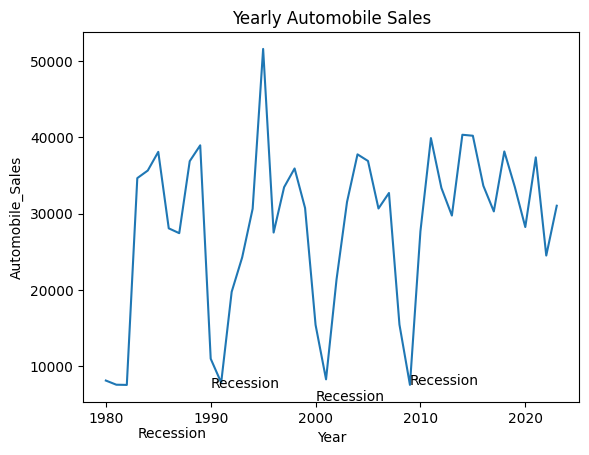

In [95]:
fig= sns.lineplot(data=df_yearlysales, x='Year', y='Automobile_Sales')

plt.title('Yearly Automobile Sales')
plt.text(2009, 7580, 'Recession')
plt.text(1983, 589, 'Recession')
plt.text(1990, 7138.8, 'Recession')
plt.text(2000, 5467, 'Recession')
plt.show()

2. Is there a noticeable difference in sales trends between different vehicle types during recession periods?

Text(0.5, 1.0, 'Sales of different Vehicles during Recession')

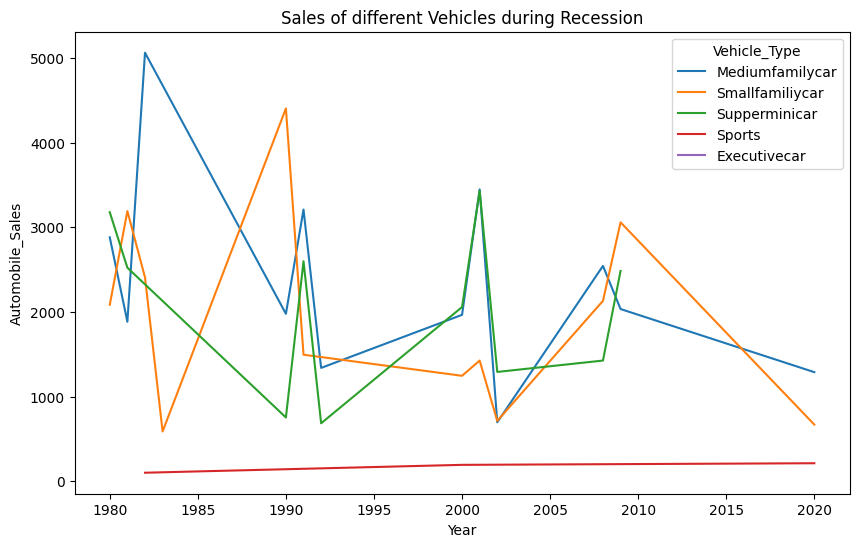

In [96]:
df_rec = df.loc[df.Recession==1].groupby(['Year','Vehicle_Type'])['Automobile_Sales'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(df_rec, x='Year', y='Automobile_Sales', hue='Vehicle_Type')

plt.title('Sales of different Vehicles during Recession')


3. How does the sales trend per vehicle type for a recession period compare with a non-recession period?

Text(0.5, 1.0, 'Vehicle Sales in Different periods')

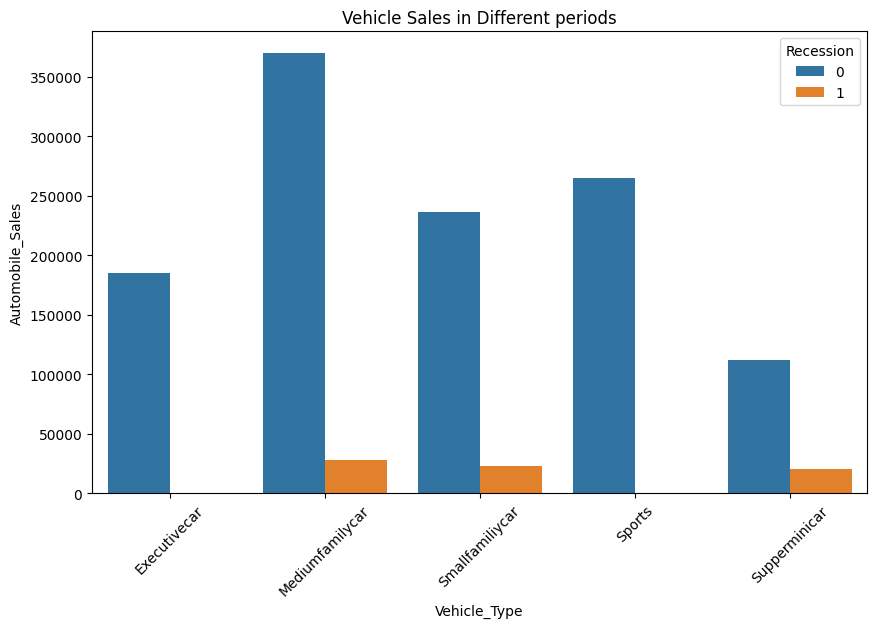

In [97]:
dfrec = df.groupby(['Vehicle_Type','Recession'])['Automobile_Sales'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=dfrec, x='Vehicle_Type', y='Automobile_Sales', hue='Recession')

plt.xticks(rotation=45)
plt.title('Vehicle Sales in Different periods')

4. What is the impact of seasonality on Automobile Sales?

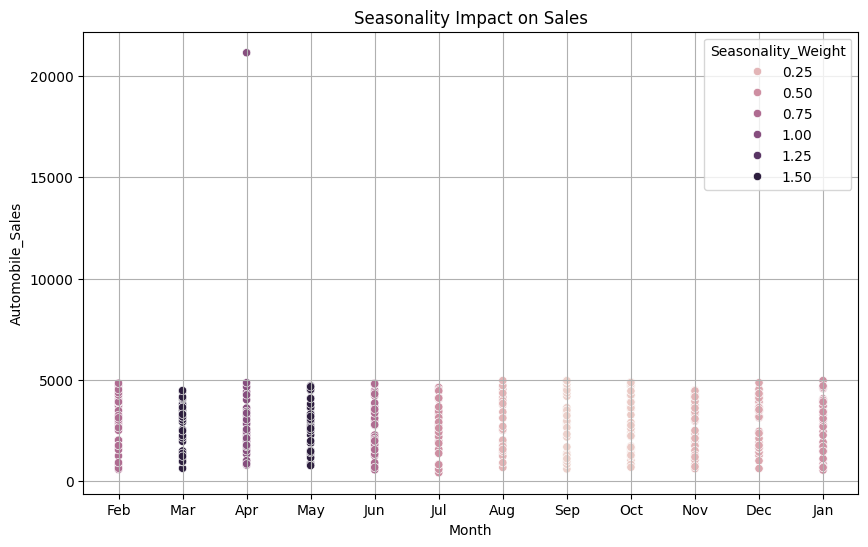

In [98]:
df1= df[df['Recession']==0]

plt.figure(figsize=(10,6))
sns.scatterplot(data=df1, x='Month', y='Automobile_Sales', hue='Seasonality_Weight')

plt.title('Seasonality Impact on Sales')
plt.grid()
plt.show()


5. Is there a correlation between average vehicle price, consumer confidence, and sales volume during recessions?

Text(0, 0.5, 'Sales')

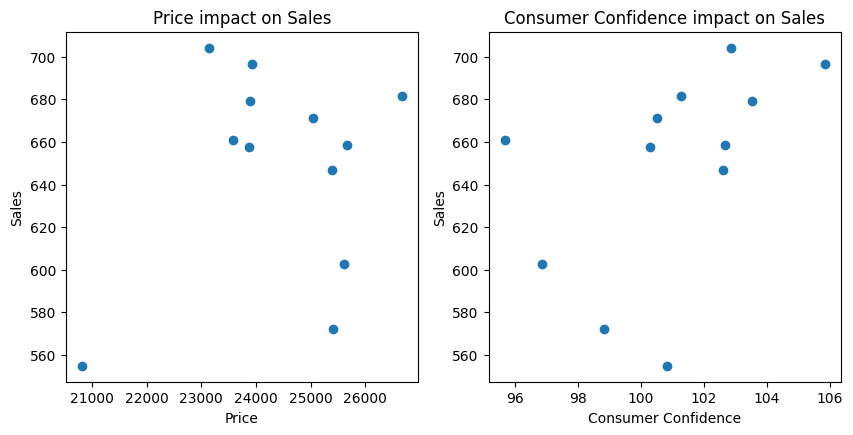

In [99]:
df2= df[df['Recession']==1].groupby('Month')[['Price','Automobile_Sales', 'Consumer_Confidence']].mean()


plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(x=df2['Price'], y=df2['Automobile_Sales'])
plt.xlabel('Price')
plt.ylabel('Sales')
plt.title('Price impact on Sales')

plt.subplot(2,2,2)
plt.scatter(x=df2['Consumer_Confidence'], y=df2['Automobile_Sales'])
plt.title('Consumer Confidence impact on Sales')
plt.xlabel('Consumer Confidence')
plt.ylabel('Sales')

6. How much of the advertising expenses were incurred in the different seasons?

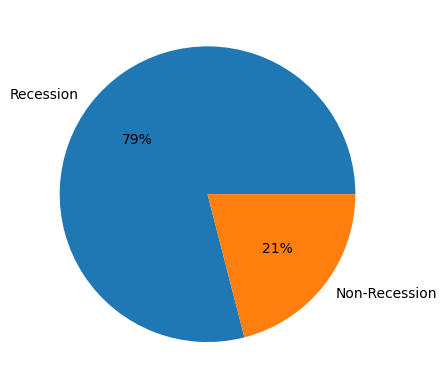

In [100]:
adv_exp= df.groupby('Recession')['Advertising_Expenditure'].sum()

plt.pie(adv_exp, labels=['Recession', 'Non-Recession'], autopct="%.0f%%")
plt.show()

7. How is the Advertisement expenditure for each vehicle type during the recession period?

In [101]:
df

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,8/31/2023,2023,Aug,0,103.36,0.25,27852.993,1793,6,57.169,0.764155,2.6,1579.6,Executivecar,New York
524,9/30/2023,2023,Sep,0,101.55,0.07,21183.704,1028,5,59.315,0.036180,2.5,1123.4,Smallfamiliycar,California
525,10/31/2023,2023,Oct,0,124.66,0.12,15975.589,1148,9,19.472,-2.046169,2.5,1685.9,Sports,California
526,11/30/2023,2023,Nov,0,97.09,0.25,16862.288,4850,5,27.904,0.302179,2.9,2124.6,Smallfamiliycar,Georgia


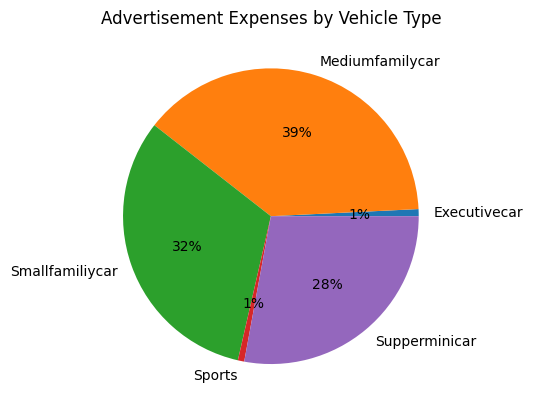

In [102]:
adv_exp2= df[df['Recession']==1].groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()

plt.pie(adv_exp2['Automobile_Sales'], labels=adv_exp2['Vehicle_Type'], autopct="%.0f%%")
plt.title('Advertisement Expenses by Vehicle Type')
plt.show()